In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/NBA Player Injury Stats(1951 - 2023).csv'
try:
    df = pd.read_csv(file_path)
    print("CSV file loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

CSV file loaded successfully!


,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
0,0,1951-12-25,Bullets,NaN,Don Barksdale,placed on IL
1,1,1952-12-26,Knicks,NaN,Max Zaslofsky,placed on IL with torn side muscle
2,2,1956-12-29,Knicks,NaN,Jim Baechtold,placed on inactive list
3,3,1959-01-16,Lakers,NaN,Elgin Baylor,player refused to play after being denied a ro...
4,4,1961-11-26,Lakers,NaN,Elgin Baylor,player reported for military duty


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df_filtered = df[df['Date'] >= '1999-10-01']
print("DataFrame filtered successfully!")
display(df_filtered.head())

DataFrame filtered successfully!


,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
3640,3640,1999-11-01,76ers,NaN,Matt Geiger,placed on IR with left knee surgery
3641,3641,1999-11-01,76ers,NaN,Stanley Roberts,placed on IL with shoulder surgery
3642,3642,1999-11-01,76ers,NaN,Theo Ratliff,placed on IR with stress fracture in left ankle
3643,3643,1999-11-01,Blazers,NaN,Brian Grant,placed on IL recovering from surgery on left knee
3644,3644,1999-11-01,Blazers,NaN,Gary Grant,placed on IL with strained right hamstring


In [11]:
df_filtered = df_filtered.dropna(subset=['Relinquished'])
print("Rows with NaN in 'Relinquished' column removed successfully!")
display(df_filtered.head())

Rows with NaN in 'Relinquished' column removed successfully!


,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
3640,3640,1999-11-01,76ers,NaN,Matt Geiger,placed on IR with left knee surgery
3641,3641,1999-11-01,76ers,NaN,Stanley Roberts,placed on IL with shoulder surgery
3642,3642,1999-11-01,76ers,NaN,Theo Ratliff,placed on IR with stress fracture in left ankle
3643,3643,1999-11-01,Blazers,NaN,Brian Grant,placed on IL recovering from surgery on left knee
3644,3644,1999-11-01,Blazers,NaN,Gary Grant,placed on IL with strained right hamstring


In [12]:
unique_acquired = df_filtered['Acquired'].unique()
print("Unique values in 'Acquired' column:")
display(unique_acquired)

Unique values in 'Acquired' column:


array([nan, ' Kyrylo Fesenko'], dtype=object)

In [13]:
row_kyrylo = df_filtered[df_filtered['Acquired'] == ' Kyrylo Fesenko']
display(row_kyrylo)

,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
14793,14793,2010-01-16,Jazz,Kyrylo Fesenko,Kyrylo Fesenko,activated from IL


In [14]:
df_filtered = df_filtered[df_filtered['Acquired'] != ' Kyrylo Fesenko']
print("Row for Kyrylo Fesenko removed successfully!")
display(df_filtered.head())

Row for Kyrylo Fesenko removed successfully!


,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
3640,3640,1999-11-01,76ers,NaN,Matt Geiger,placed on IR with left knee surgery
3641,3641,1999-11-01,76ers,NaN,Stanley Roberts,placed on IL with shoulder surgery
3642,3642,1999-11-01,76ers,NaN,Theo Ratliff,placed on IR with stress fracture in left ankle
3643,3643,1999-11-01,Blazers,NaN,Brian Grant,placed on IL recovering from surgery on left knee
3644,3644,1999-11-01,Blazers,NaN,Gary Grant,placed on IL with strained right hamstring


In [15]:
def get_nba_season(date):
    if date.month >= 10:
        return date.year + 1
    else:
        return date.year

df_filtered['Season'] = df_filtered['Date'].apply(get_nba_season)
print(" 'Season' column created successfully!")
display(df_filtered.head())
print("\nUnique values in 'Season' column:")
display(df_filtered['Season'].unique())

 'Season' column created successfully!


,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes,Season
3640,3640,1999-11-01,76ers,NaN,Matt Geiger,placed on IR with left knee surgery,2000
3641,3641,1999-11-01,76ers,NaN,Stanley Roberts,placed on IL with shoulder surgery,2000
3642,3642,1999-11-01,76ers,NaN,Theo Ratliff,placed on IR with stress fracture in left ankle,2000
3643,3643,1999-11-01,Blazers,NaN,Brian Grant,placed on IL recovering from surgery on left knee,2000
3644,3644,1999-11-01,Blazers,NaN,Gary Grant,placed on IL with strained right hamstring,2000



Unique values in 'Season' column:


array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

## Create mapping

### Subtask:
Create a mapping between the keywords and simplified injury categories (e.g., 'knee', 'illness', 'ankle').


In [18]:
injury_mapping = {
    'knee': 'knee',
    'knees': 'knee',
    'acl': 'knee',
    'meniscus': 'knee',
    'mcl': 'knee',
    'patella': 'knee',
    'achilles': 'achilles',
    'illness': 'illness',
    'ankle': 'ankle',
    'ankles': 'ankle',
    'hamstring': 'hamstring',
    'hamstrings': 'hamstring',
    'back': 'back',
    'foot': 'foot',
    'feet': 'foot',
    'heel': 'foot',
    'toes': 'foot',
    'foot': 'foot',
    'toe': 'foot',
    'shoulder': 'shoulder',
    'shoulders': 'shoulder',
    'hand': 'hand',
    'hands': 'hand',
    'wrist': 'wrist',
    'wrists': 'wrist',
    'finger': 'hand',
    'fingers': 'hand',
    'fingertip': 'hand',
    'fingertips': 'hand',
    'pinky': 'hand',
    'thumb': 'hand',
    'thumbs': 'hand',
    'groin': 'groin',
    'groins': 'groin',
    'buttocks': 'glute',
    'tailbone': 'back',
    'pelvis': 'pelvis',
    'pelvic': 'pelvis',
    'quadriceps': 'leg',
    'quadricep': 'leg',
    'quads': 'leg',
    'thigh': 'leg',
    'thighs': 'leg',
    'leg': 'leg',
    'legs': 'leg',
    'femur': 'leg',
    'femurs': 'leg',
    'calf': 'calf',
    'calves': 'calf',
    'hip': 'hip',
    'hips': 'hip',
    'concussion': 'head',
    'dental': 'face',
    'face': 'face',
    'eye': 'face',
    'eyes': 'face',
    'nose': 'face',
    'head': 'head',
    'neck': 'neck',
    'abdominal': 'torso',
    'rib': 'torso',
    'ribs': 'torso',
    'sternum': 'torso',
    'chest': 'torso',
    'elbow': 'arm',
    'elbows': 'arm',
    'arm': 'arm',
    'arms': 'arm',
    'forearm': 'arm',
    'forearms': 'arm',
    'bicep': 'arm',
    'biceps': 'arm',
    'tricep': 'arm',
    'triceps': 'arm',
    'appendectomy': 'illness',
    'tonsillitis': 'illness',
    'flu': 'illness',
    'covid': 'illness',
    'blood clot': 'illness',
    'blood clots': 'illness',
    'arthritis': 'illness',
    'allergic': 'illness',
    'health and safety protocols': 'illness',
    'personal reasons': 'personal',
    'rest': 'rest',
    'ill': 'illness',
    'sick': 'illness',
    'infection': 'illness',
    'dental procedure': 'dental',
    'migraine': 'illness',
    'paternity leave': 'personal',
    'family': 'personal',
    'bereavement': 'personal',
    'personal': 'personal',
    'suspended': 'suspension',
    'leave of absence': 'personal',
    'quarantine': 'illness',
    'shin': 'leg',
    'tibia': 'leg',
    'cheekbone': 'face',
    'facial': 'face',
    'cheekbones': 'face',
    'ulcer': 'illness',
    'spine': 'back',
    'strep throat': 'illness',
    'arthritis': 'illness',
    'rotator cuff': 'shoulder',
    'chicken pox': 'illness',
    'hernia': 'back',
    'herniated': 'back',
    'lumbar': 'back',
    'stomach muscle': 'torso',
    'sinusitis': 'illness',
    'gastritis': 'illness',
    'allergic': 'illness',
    'infection': 'illness',
    'malaria': 'illness',
    'plantar': 'foot',
    'virus': 'illness',
    'sinus': 'face',
    'ribcage': 'torso',
    'adductor': 'hip',
    'covid-19': 'illness',
    'cervical': 'back',
    'core': 'torso',
    'bronchitis': 'illness',
    'oblique': 'torso',
    'heart': 'illness',
    'birth': 'personal',
    'death': 'personal',
    'suspension': 'suspension',
    'jaw': 'face',
    'dental': 'face',
    'tooth': 'face',
    'dental': 'face',
    'heartbeat': 'illness',
    'vertebrae': 'back',
    'glute': 'glute',
    'glutes': 'glute',
    'thoracic': 'back',
    'pec': 'torso',
    'pectoral': 'torso',
    'orbital': 'face',
    'fibula': 'leg',
    'disc': 'back',
    'gastro%': 'illness',
    'respiratory': 'illness',
    'clavicle': 'shoulder',
    'buttock': 'glute',
    'poisoning': 'illness',
    'spinal': 'back',
    'teeth': 'face',
    'ear': 'face',
    'root canal': 'face',
    'abductor': 'hip'

}

In [19]:
def simplify_notes(notes, mapping):
    if isinstance(notes, str):
        notes = notes.lower()
        if notes == 'placed on il':
            return 'Injury Not Specified'
        for keyword, simplified_category in mapping.items():
            if keyword in notes:
                return simplified_category
    return 'other'

df_filtered['simplified_notes'] = df_filtered['Notes'].apply(lambda x: simplify_notes(x, injury_mapping))
display(df_filtered[['Notes', 'simplified_notes']].head())

,Notes,simplified_notes
3640,placed on IR with left knee surgery,knee
3641,placed on IL with shoulder surgery,shoulder
3642,placed on IR with stress fracture in left ankle,ankle
3643,placed on IL recovering from surgery on left knee,knee
3644,placed on IL with strained right hamstring,hamstring


In [21]:
simplified_notes_counts = df_filtered['simplified_notes'].value_counts()
display(simplified_notes_counts)

,count
simplified_notes,
Injury Not Specified,5920
knee,2378
ankle,1766
illness,1421
back,1006
foot,864
hamstring,493
hand,477
leg,442


In [23]:
output_file_path = '/content/drive/MyDrive/Colab Notebooks/NBA_Player_Injury_Stats_Filtered.csv'
df_filtered.to_csv(output_file_path, index=False)
print(f"DataFrame successfully exported to {output_file_path}")

DataFrame successfully exported to /content/drive/MyDrive/Colab Notebooks/NBA_Player_Injury_Stats_Filtered.csv


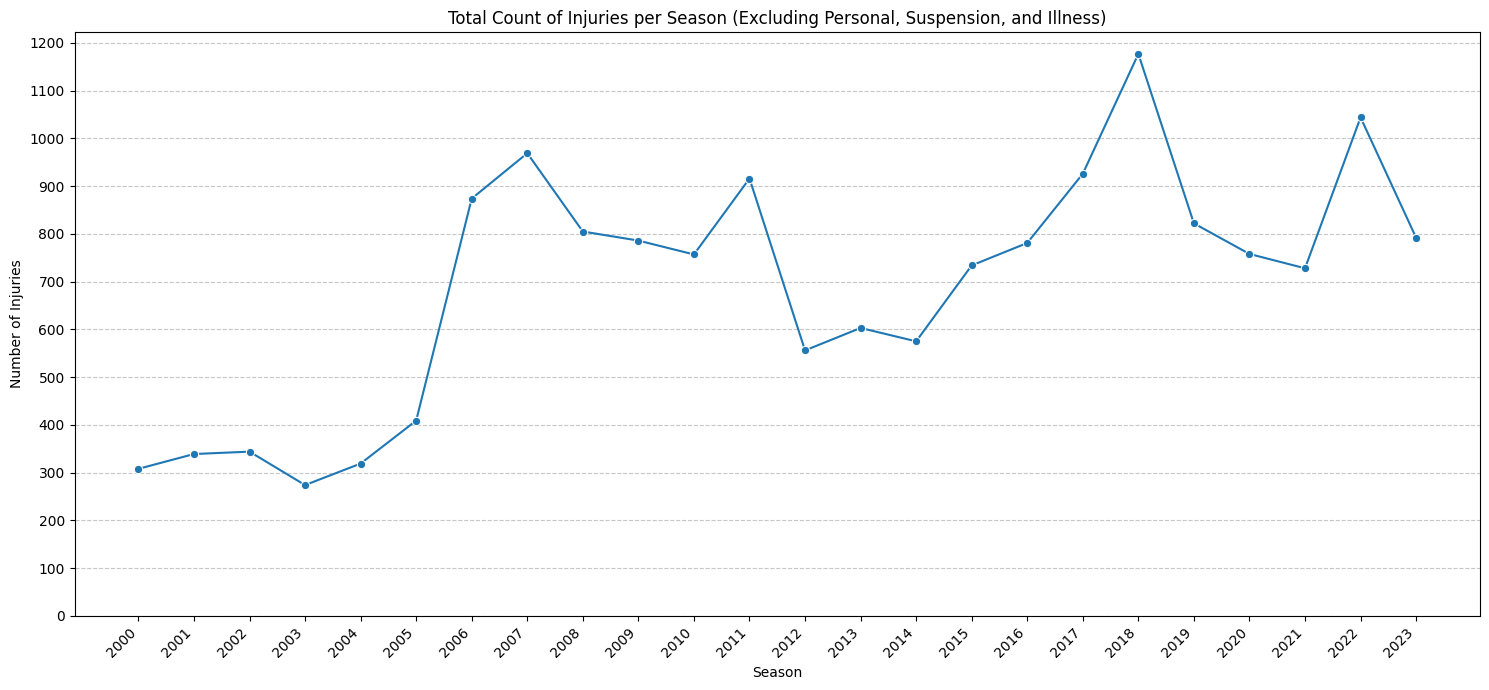

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exclude specific simplified_notes values
excluded_notes = ['personal', 'suspension', 'illness']
df_injuries_filtered = df_filtered[~df_filtered['simplified_notes'].isin(excluded_notes)]

# Group by Season and count injuries
injuries_per_season = df_injuries_filtered.groupby('Season').size().reset_index(name='Injury_Count')

# Create the line plot
plt.figure(figsize=(15, 7))
sns.lineplot(x='Season', y='Injury_Count', data=injuries_per_season, marker='o') # Added marker for clarity
plt.title('Total Count of Injuries per Season (Excluding Personal, Suspension, and Illness)')
plt.xlabel('Season')
plt.ylabel('Number of Injuries')
plt.xticks(injuries_per_season['Season'], rotation=45, ha='right') # Set all unique seasons as x-ticks

# Set y-axis ticks to show more labels
min_count = injuries_per_season['Injury_Count'].min()
max_count = injuries_per_season['Injury_Count'].max()
plt.yticks(np.arange(0, max_count + 100, 100)) # Adjust step (100) as needed for desired density

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

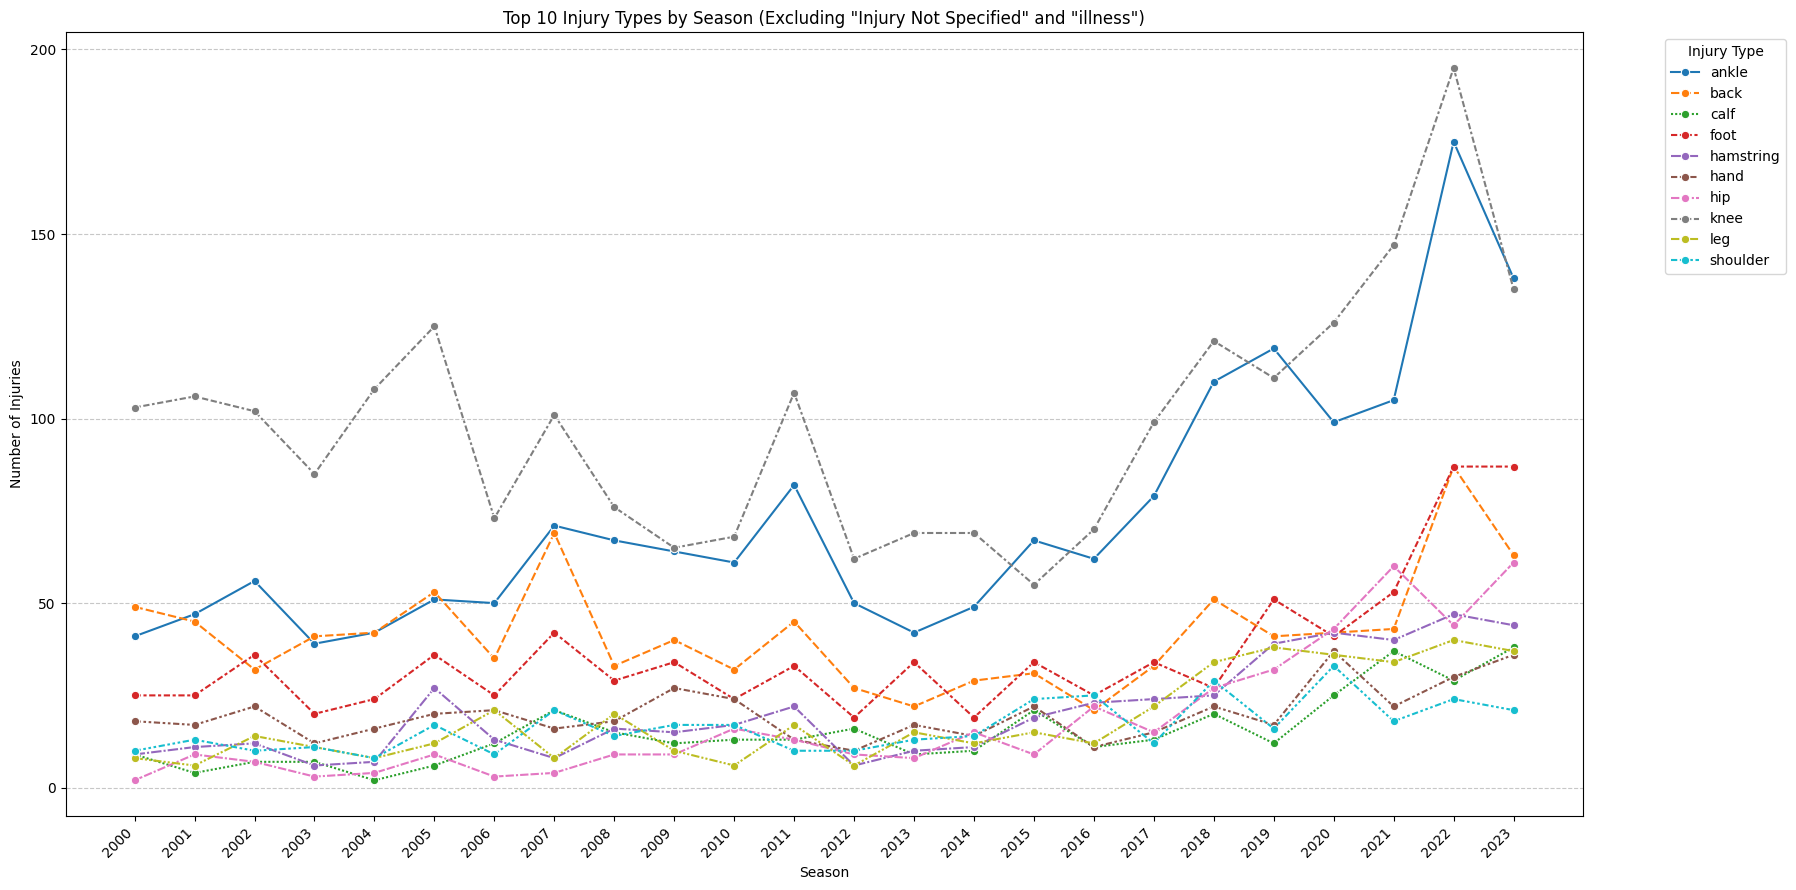

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out 'Injury Not Specified' and 'illness' from simplified_notes
df_top_injuries = df_filtered[~df_filtered['simplified_notes'].isin(['Injury Not Specified', 'illness'])]

# Get the top 10 injury types from the remaining data
top_10_injury_types = df_top_injuries['simplified_notes'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only the new top 10 injury types
df_top_10_filtered = df_top_injuries[df_top_injuries['simplified_notes'].isin(top_10_injury_types)]

# Group by Season and simplified_notes and count occurrences
injuries_by_season_type = df_top_10_filtered.groupby(['Season', 'simplified_notes']).size().unstack(fill_value=0)

# Create the line plot
plt.figure(figsize=(18, 9))
sns.lineplot(data=injuries_by_season_type, marker='o')
plt.title('Top 10 Injury Types by Season (Excluding "Injury Not Specified" and "illness")')
plt.xlabel('Season')
plt.ylabel('Number of Injuries')
plt.xticks(injuries_by_season_type.index, rotation=45, ha='right')
plt.yticks(np.arange(0, injuries_by_season_type.values.max() + 50, 50)) # Adjust step as needed
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

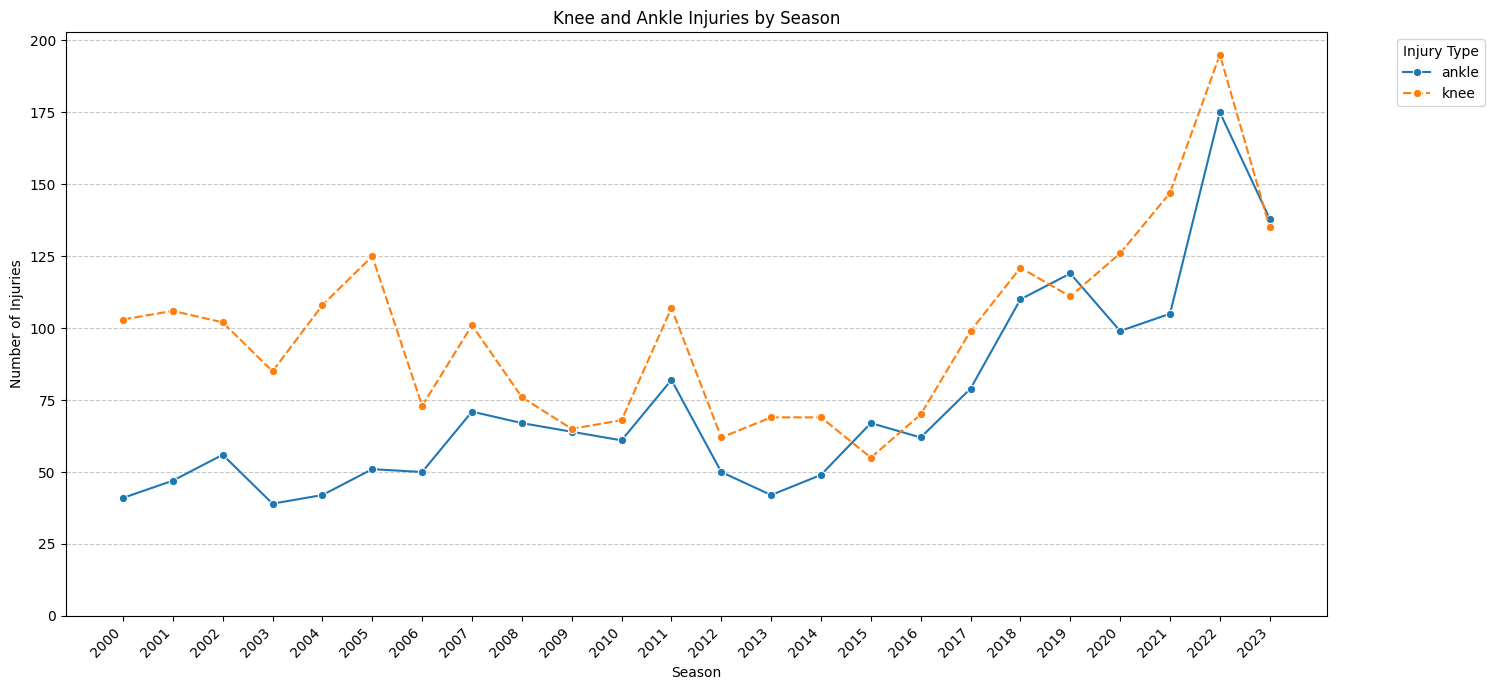

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter for only 'knee' and 'ankle' injuries
df_specific_injuries = df_filtered[df_filtered['simplified_notes'].isin(['knee', 'ankle'])]

# Group by Season and simplified_notes and count occurrences
specific_injuries_by_season_type = df_specific_injuries.groupby(['Season', 'simplified_notes']).size().unstack(fill_value=0)

# Create the line plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=specific_injuries_by_season_type, marker='o')
plt.title('Knee and Ankle Injuries by Season')
plt.xlabel('Season')
plt.ylabel('Number of Injuries')
plt.xticks(specific_injuries_by_season_type.index, rotation=45, ha='right')
plt.yticks(np.arange(0, specific_injuries_by_season_type.values.max() + 25, 25)) # Adjust step as needed
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
file_path_stats = '/content/drive/MyDrive/Colab Notebooks/League Wide Stats.csv'
try:
    stats_df = pd.read_csv(file_path_stats)
    print("League Wide Stats CSV file loaded successfully!")
    display(stats_df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path_stats}")
except Exception as e:
    print(f"An error occurred: {e}")

League Wide Stats CSV file loaded successfully!


,Rk,Year,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
0,1.0,2026.0,NBA,26.5,7-Jun,216.0,103.0,49840.0,8599.0,18285.0,...,0.470,0.355,0.784,100.8,0.545,13.3,26.0,0.231,115.4,0.584
1,2.0,2025.0,NBA,26.3,7-Jun,215.0,1230.0,593600.0,102566.0,219527.0,...,0.467,0.360,0.780,98.8,0.543,12.6,25.2,0.189,114.5,0.576
2,3.0,2024.0,NBA,26.4,7-Jun,216.0,1230.0,593750.0,103739.0,218702.0,...,0.474,0.366,0.784,98.5,0.547,12.1,24.2,0.192,115.3,0.580
3,4.0,2023.0,NBA,26.1,6-Jun,216.0,1230.0,594850.0,103260.0,217219.0,...,0.475,0.361,0.782,99.2,0.545,12.5,24.0,0.208,114.8,0.581
4,5.0,2022.0,NBA,26.1,6-Jun,215.0,1230.0,593750.0,99930.0,216722.0,...,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0,0.566


In [33]:
stats_df_filtered = stats_df[stats_df['Year'] <= 2023]
print("stats_df filtered to include years up to and including 2023:")
display(stats_df_filtered.head())

stats_df filtered to include years up to and including 2023:


,Rk,Year,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
3,4.0,2023.0,NBA,26.1,6-Jun,216.0,1230.0,594850.0,103260.0,217219.0,...,0.475,0.361,0.782,99.2,0.545,12.5,24.0,0.208,114.8,0.581
4,5.0,2022.0,NBA,26.1,6-Jun,215.0,1230.0,593750.0,99930.0,216722.0,...,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0,0.566
5,6.0,2021.0,NBA,26.1,6-Jun,217.0,1080.0,521500.0,89020.0,190983.0,...,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3,0.572
6,7.0,2020.0,NBA,26.1,6-Jun,218.0,1059.0,512070.0,86550.0,188116.0,...,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6,0.565
7,8.0,2019.0,NBA,26.3,6-Jun,219.0,1230.0,594450.0,101062.0,219458.0,...,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4,0.560


In [36]:
# Calculate the per-game statistics
stats_df_filtered['FGA/G'] = stats_df_filtered['FGA'] / stats_df_filtered['G']
stats_df_filtered['3PA/G'] = stats_df_filtered['3PA'] / stats_df_filtered['G']
stats_df_filtered['FTA/G'] = stats_df_filtered['FTA'] / stats_df_filtered['G']
stats_df_filtered['PF/G'] = stats_df_filtered['PF'] / stats_df_filtered['G']

# Create the new DataFrame with selected columns
stats_df_selected = stats_df_filtered[['Year', 'FGA/G', '3PA/G', 'FTA/G', 'PF/G', 'Pace']]

print("New DataFrame created with calculated and selected columns:")
display(stats_df_selected.head())

New DataFrame created with calculated and selected columns:


/tmp/ipython-input-2294094545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df_filtered['FGA/G'] = stats_df_filtered['FGA'] / stats_df_filtered['G']
/tmp/ipython-input-2294094545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df_filtered['3PA/G'] = stats_df_filtered['3PA'] / stats_df_filtered['G']
/tmp/ipython-input-2294094545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Year,FGA/G,3PA/G,FTA/G,PF/G,Pace
3,2023.0,176.600813,68.426829,47.057724,39.958537,99.2
4,2022.0,176.196748,70.353659,43.724390,39.273171,98.2
5,2021.0,176.836111,69.279630,43.643519,38.581481,99.2
6,2020.0,177.635505,68.226629,46.216242,41.552408,100.3
7,2019.0,178.421138,64.017886,46.144715,41.808943,100.0


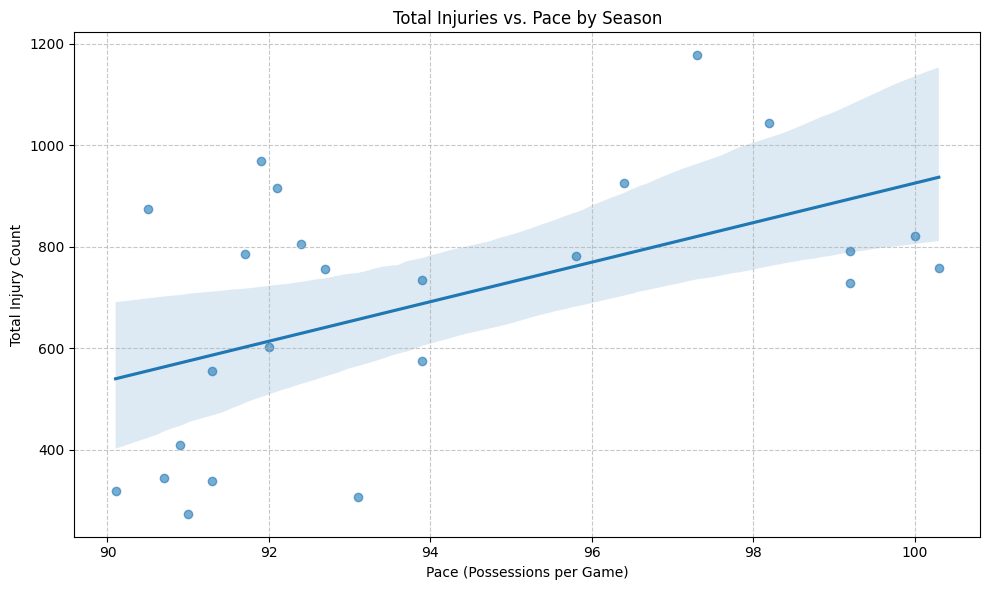

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot comparing total injuries to Pace by season
plt.figure(figsize=(10, 6))
sns.regplot(x='Pace', y='Injury_Count', data=merged_df, scatter_kws={'alpha':0.6})
plt.title('Total Injuries vs. Pace by Season')
plt.xlabel('Pace (Possessions per Game)')
plt.ylabel('Total Injury Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

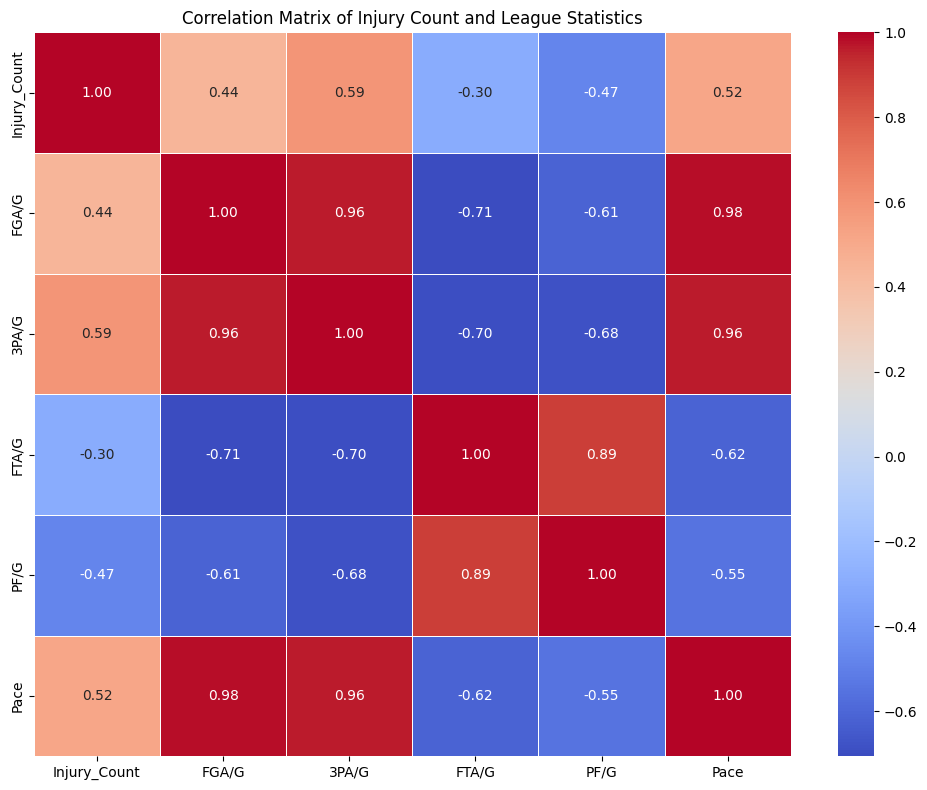

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for correlation analysis
correlation_data = merged_df[['Injury_Count', 'FGA/G', '3PA/G', 'FTA/G', 'PF/G', 'Pace']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Injury Count and League Statistics')
plt.tight_layout()
plt.show()

# Task
The user wants to perform a regression analysis to determine the factors influencing injury counts and visualize the findings. This involves:

1.  **Performing a multiple linear regression analysis**: Using the `merged_df` (which contains injury counts and per-game statistics), 'Injury_Count' will be the dependent variable, and 'FGA/G', '3PA/G', 'FTA/G', 'PF/G', and 'Pace' will be the independent variables. The `statsmodels` library will be used for this.
2.  **Interpreting the regression results**: Analyzing the coefficients, p-values, and R-squared from the regression summary to understand the impact of each independent variable on injury counts.
3.  **Visualizing the relationships**: Creating plots to show the relationship between the total injury count per year and the most influential independent variables identified from the regression. The plots will include appropriate titles, labels, and legends.
4.  **Summarizing the findings**: Providing a concise summary of which factors significantly influence annual injury counts and interpreting the visualizations.

```python
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure Year columns are of the same type for merging
# The existing merged_df in the kernel state seems to be correctly prepared,
# but to be robust, let's ensure the Year column in stats_df_selected is integer
stats_df_selected['Year'] = stats_df_selected['Year'].astype(int)

# Assuming injuries_per_season already has 'Year' column as seen in the kernel state
# If not, add the following line:
# injuries_per_season = injuries_per_season.rename(columns={'Season': 'Year'})

# Re-merging to ensure consistency, though merged_df already exists from prior execution
# This step ensures the merge is done with integer 'Year' types
merged_df = pd.merge(injuries_per_season, stats_df_selected, on='Year', how='inner')

print("Merged DataFrame for Regression:")
display(merged_df.head())
print("\nMerged DataFrame info:")
merged_df.info()

# 1. Perform Regression Analysis
# Define dependent and independent variables
Y = merged_df['Injury_Count']
X = merged_df[['FGA/G', '3PA/G', 'FTA/G', 'PF/G', 'Pace']]

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(Y, X).fit()

# Print the regression summary
print("\nMultiple Linear Regression Summary:")
print(model.summary())

# 2. Interpret and Visualize Results
# Identify influential variables based on p-values (common threshold p < 0.05)
# Extract p-values for independent variables
p_values = model.pvalues[1:] # Exclude the constant's p-value

print("\nP-values for independent variables:")
print(p_values.sort_values())

# Select the top 2-3 most influential variables (lowest p-values)
# Filter for variables with p < 0.05 first, then pick top 3 if available
significant_vars = p_values[p_values < 0.05].sort_values().index.tolist()

if len(significant_vars) > 3:
    top_influential_vars = significant_vars[:3]
elif len(significant_vars) > 0:
    top_influential_vars = significant_vars
else:
    # If no variables are statistically significant, pick the top 3 with lowest p-values
    top_influential_vars = p_values.sort_values().index.tolist()[:3]

print(f"\nTop {len(top_influential_vars)} influential variables based on p-value (p < 0.05 where applicable):")
print(top_influential_vars)


# Generate plots for the top influential variables
plt.figure(figsize=(18, 6 * len(top_influential_vars)))
for i, var in enumerate(top_influential_vars):
    plt.subplot(len(top_influential_vars), 1, i + 1)
    sns.regplot(x=var, y='Injury_Count', data=merged_df, scatter_kws={'alpha':0.6})
    plt.title(f'Injury Count vs. {var} (R-squared: {model.rsquared:.2f})')
    plt.xlabel(var)
    plt.ylabel('Total Injury Count')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 3. Final Task: Summarize the findings
print("\n--- Summary of Regression Analysis ---")
print(f"The R-squared value for the model is: {model.rsquared:.3f}")
print("This indicates the proportion of variance in 'Injury_Count' that can be predicted from the independent variables.")
print("\nKey findings from the regression analysis:")

if not top_influential_vars:
    print("No statistically significant variables (p < 0.05) were found to influence total injury counts.")
else:
    for var in top_influential_vars:
        coefficient = model.params[var]
        p_value = model.pvalues[var]
        if p_value < 0.05:
            print(f"- **{var}**: Has a statistically significant impact (p={p_value:.3f}).")
            print(f"  Coefficient: {coefficient:.3f}. A {'positive' if coefficient > 0 else 'negative'} relationship, meaning a unit increase in {var} is associated with a change of {abs(coefficient):.3f} in 'Injury_Count'.")
        else:
            print(f"- **{var}**: While among the top by p-value, it does not show a statistically significant impact (p={p_value:.3f}).")
            print(f"  Coefficient: {coefficient:.3f}.")

    print("\nVisualizations interpretation:")
    print("The scatter plots with regression lines illustrate these relationships over time.")
    print("A positive slope indicates that as the independent variable increases, the injury count tends to increase.")
    print("A negative slope indicates the opposite trend.")
    print("The spread of data points around the line indicates the variability not explained by the model.")

print("\nFurther analysis might involve exploring non-linear relationships, interaction terms, or time-series specific models given the yearly nature of the data.")
```

## Prepare Injury Data

### Subtask:
Calculate the total injury count per season from the `df_filtered` DataFrame, explicitly excluding 'personal', 'suspension', and 'illness' categories. Then, rename the 'Season' column to 'Year' for merging.


**Reasoning**:
The subtask requires renaming the 'Season' column in the `injuries_per_season` DataFrame to 'Year'.



In [39]:
injuries_per_season = injuries_per_season.rename(columns={'Season': 'Year'})
print(" 'Season' column in 'injuries_per_season' renamed to 'Year' successfully!")
display(injuries_per_season.head())

 'Season' column in 'injuries_per_season' renamed to 'Year' successfully!


,Year,Injury_Count
0,2000,308
1,2001,339
2,2002,344
3,2003,274
4,2004,319


## Merge DataFrames

### Subtask:
Merge the `injuries_per_season` DataFrame (with injury counts) with the `stats_df_selected` DataFrame (with per-game statistics) on the 'Year' column. Handle any potential missing years or data discrepancies.


**Reasoning**:
The subtask requires merging two DataFrames, `injuries_per_season` and `stats_df_selected`, on a common 'Year' column. To ensure a successful merge, the 'Year' column in `stats_df_selected` needs to be converted to an integer type. After merging, displaying the head and info of the new `merged_df` will verify the operation and data integrity.



In [40]:
import pandas as pd

# 1. Convert the 'Year' column in the stats_df_selected DataFrame to an integer type
stats_df_selected['Year'] = stats_df_selected['Year'].astype(int)

# 2. Merge the injuries_per_season DataFrame with the stats_df_selected DataFrame
merged_df = pd.merge(injuries_per_season, stats_df_selected, on='Year', how='inner')

# 3. Display the first few rows of the merged_df to verify the merge was successful
print("Merged DataFrame:")
display(merged_df.head())

# 4. Print the information about the merged_df using the .info() method
print("\nMerged DataFrame Info:")
merged_df.info()

Merged DataFrame:


/tmp/ipython-input-1737878015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df_selected['Year'] = stats_df_selected['Year'].astype(int)


,Year,Injury_Count,FGA/G,3PA/G,FTA/G,PF/G,Pace
0,2000,308,164.188394,27.429773,50.555929,46.600505,93.1
1,2001,339,161.197645,27.415475,49.736754,44.695542,91.3
2,2002,344,162.542473,29.498738,47.645080,42.470143,90.7
3,2003,274,161.571909,29.362489,48.867115,43.507149,91.0
4,2004,319,159.631623,29.850294,48.413793,42.898234,90.1



Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24 non-null     int64  
 1   Injury_Count  24 non-null     int64  
 2   FGA/G         24 non-null     float64
 3   3PA/G         24 non-null     float64
 4   FTA/G         24 non-null     float64
 5   PF/G          24 non-null     float64
 6   Pace          24 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.4 KB


**Reasoning**:
The previous code generated a `SettingWithCopyWarning` because of modifying a slice of a DataFrame. To resolve this, I will explicitly create a copy of `stats_df_selected` before converting the 'Year' column to an integer type. This ensures that the modifications are made on a dedicated copy, preventing the warning.



In [41]:
import pandas as pd

# 1. Convert the 'Year' column in the stats_df_selected DataFrame to an integer type
# Create a copy to avoid SettingWithCopyWarning
stats_df_selected = stats_df_selected.copy()
stats_df_selected['Year'] = stats_df_selected['Year'].astype(int)

# 2. Merge the injuries_per_season DataFrame with the stats_df_selected DataFrame
merged_df = pd.merge(injuries_per_season, stats_df_selected, on='Year', how='inner')

# 3. Display the first few rows of the merged_df to verify the merge was successful
print("Merged DataFrame:")
display(merged_df.head())

# 4. Print the information about the merged_df using the .info() method
print("\nMerged DataFrame Info:")
merged_df.info()

Merged DataFrame:


,Year,Injury_Count,FGA/G,3PA/G,FTA/G,PF/G,Pace
0,2000,308,164.188394,27.429773,50.555929,46.600505,93.1
1,2001,339,161.197645,27.415475,49.736754,44.695542,91.3
2,2002,344,162.542473,29.498738,47.645080,42.470143,90.7
3,2003,274,161.571909,29.362489,48.867115,43.507149,91.0
4,2004,319,159.631623,29.850294,48.413793,42.898234,90.1



Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24 non-null     int64  
 1   Injury_Count  24 non-null     int64  
 2   FGA/G         24 non-null     float64
 3   3PA/G         24 non-null     float64
 4   FTA/G         24 non-null     float64
 5   PF/G          24 non-null     float64
 6   Pace          24 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.4 KB


**Reasoning**:
The previous steps successfully merged the dataframes. Now, as per the main task, I will perform a multiple linear regression analysis using `statsmodels` to determine the factors influencing injury counts. This involves defining dependent and independent variables, adding a constant for the intercept, fitting the OLS model, and printing the regression summary.



In [42]:
import statsmodels.api as sm

# Define dependent and independent variables
Y = merged_df['Injury_Count']
X = merged_df[['FGA/G', '3PA/G', 'FTA/G', 'PF/G', 'Pace']]

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(Y, X).fit()

# Print the regression summary
print("Multiple Linear Regression Summary:")
print(model.summary())

Multiple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:           Injury_Count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     9.420
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           0.000152
Time:                        23:20:46   Log-Likelihood:                -150.89
No. Observations:                  24   AIC:                             313.8
Df Residuals:                      18   BIC:                             320.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5998

**Reasoning**:
Now that the regression analysis has been performed, I will interpret the results by extracting the p-values from the model summary to identify the statistically significant independent variables. I will then select the top influential variables for further visualization, as described in the next part of the original task.




P-values for independent variables:
FGA/G    0.001339
Pace     0.007868
3PA/G    0.067595
PF/G     0.246513
FTA/G    0.995224
dtype: float64

Top 2 influential variables based on p-value (p < 0.05 where applicable):
['FGA/G', 'Pace']


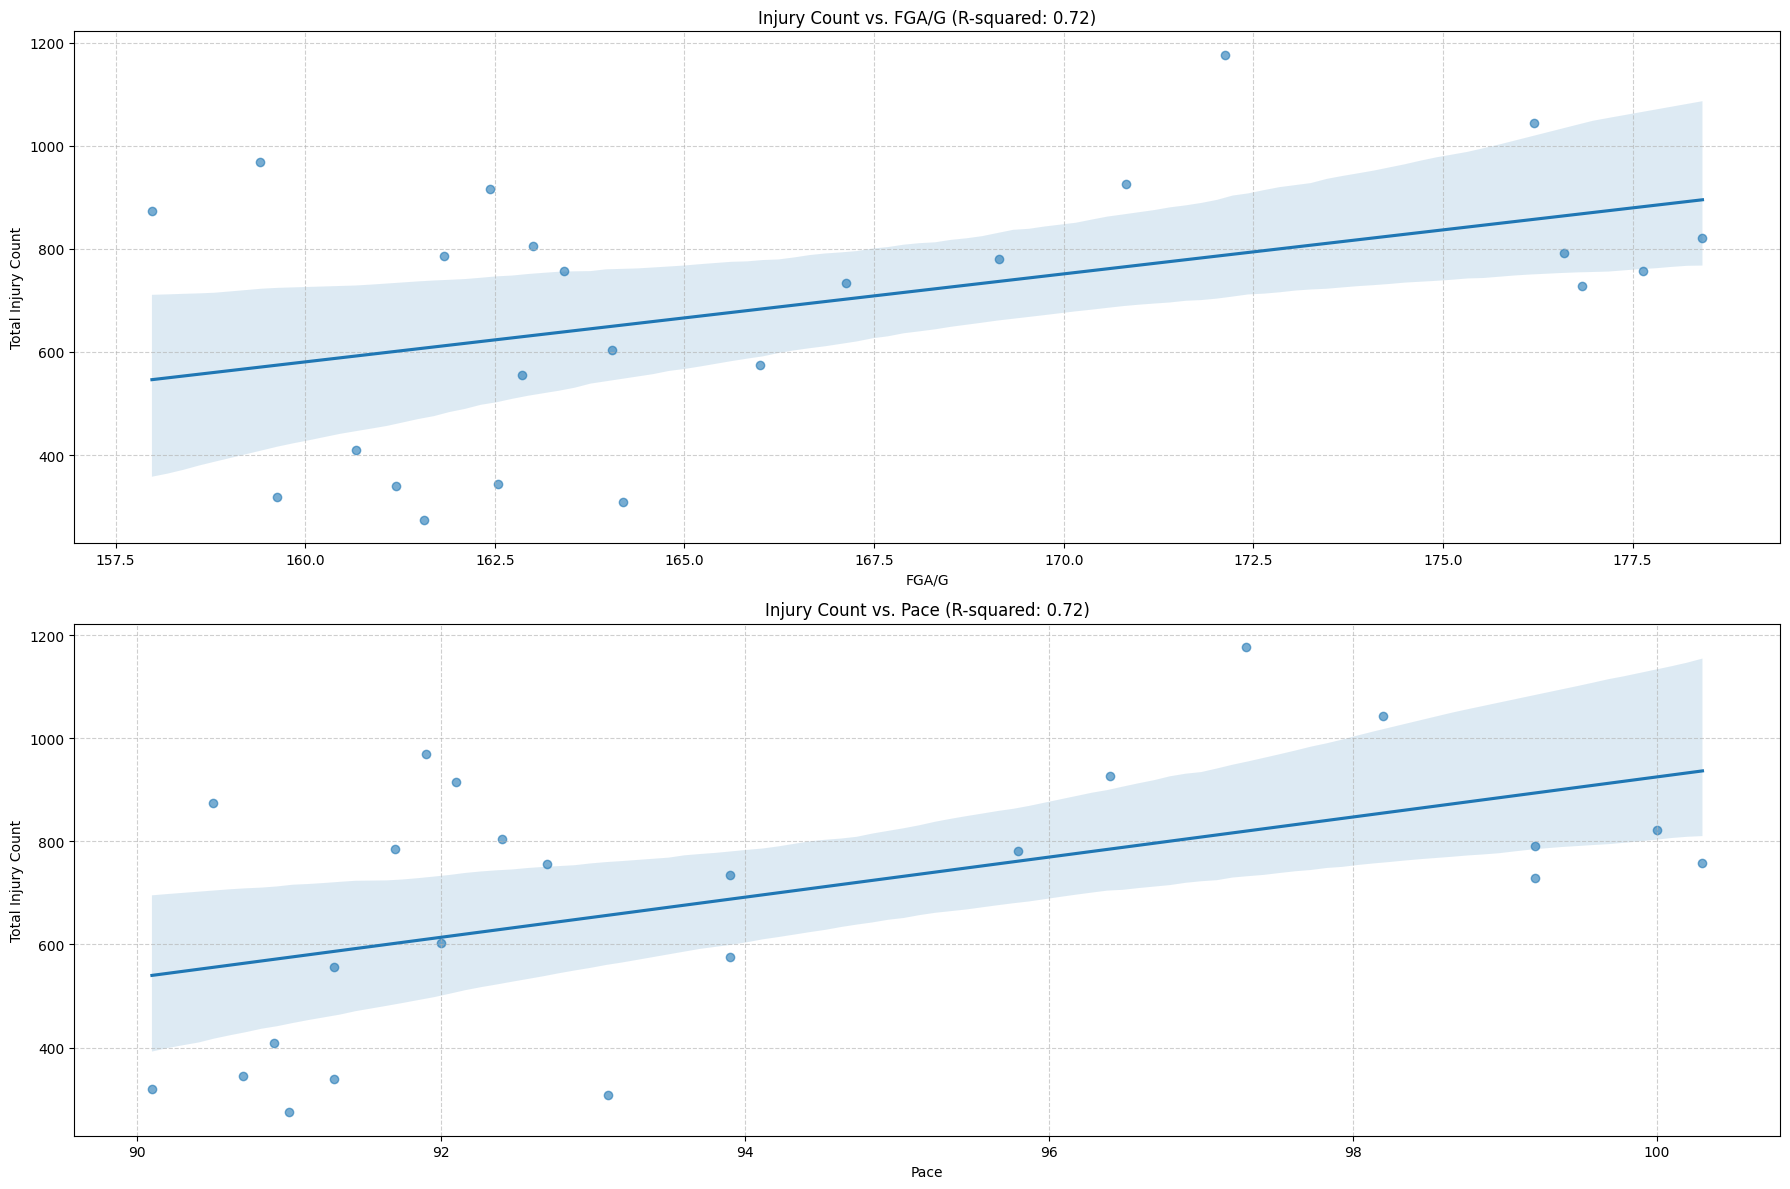


--- Summary of Regression Analysis ---
The R-squared value for the model is: 0.724
This indicates the proportion of variance in 'Injury_Count' that can be predicted from the independent variables.

Key findings from the regression analysis:
- **FGA/G**: Has a statistically significant impact (p=0.001).
  Coefficient: -149.319. A negative relationship, meaning a unit increase in FGA/G is associated with a change of 149.319 in 'Injury_Count'.
- **Pace**: Has a statistically significant impact (p=0.008).
  Coefficient: 219.084. A positive relationship, meaning a unit increase in Pace is associated with a change of 219.084 in 'Injury_Count'.

Visualizations interpretation:
The scatter plots with regression lines illustrate these relationships over time.
A positive slope indicates that as the independent variable increases, the injury count tends to increase.
A negative slope indicates the opposite trend.
The spread of data points around the line indicates the variability not explained by 

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Interpret the regression results by identifying influential variables based on p-values
# Extract p-values for independent variables (excluding the constant's p-value)
p_values = model.pvalues[1:]

print("\nP-values for independent variables:")
print(p_values.sort_values())

# Select the top influential variables (p < 0.05) or the top 3 if none are significant
significant_vars = p_values[p_values < 0.05].sort_values().index.tolist()

if len(significant_vars) > 3:
    top_influential_vars = significant_vars[:3]
elif len(significant_vars) > 0:
    top_influential_vars = significant_vars
else:
    # If no variables are statistically significant, pick the top 3 with lowest p-values
    top_influential_vars = p_values.sort_values().index.tolist()[:3]

print(f"\nTop {len(top_influential_vars)} influential variables based on p-value (p < 0.05 where applicable):")
print(top_influential_vars)

# Generate plots for the top influential variables
plt.figure(figsize=(18, 6 * len(top_influential_vars)))
for i, var in enumerate(top_influential_vars):
    plt.subplot(len(top_influential_vars), 1, i + 1)
    sns.regplot(x=var, y='Injury_Count', data=merged_df, scatter_kws={'alpha':0.6})
    plt.title(f'Injury Count vs. {var} (R-squared: {model.rsquared:.2f})')
    plt.xlabel(var)
    plt.ylabel('Total Injury Count')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Summarize the findings
print("\n--- Summary of Regression Analysis ---")
print(f"The R-squared value for the model is: {model.rsquared:.3f}")
print("This indicates the proportion of variance in 'Injury_Count' that can be predicted from the independent variables.")
print("\nKey findings from the regression analysis:")

if not top_influential_vars:
    print("No statistically significant variables (p < 0.05) were found to influence total injury counts.")
else:
    for var in top_influential_vars:
        coefficient = model.params[var]
        p_value = model.pvalues[var]
        if p_value < 0.05:
            print(f"- **{var}**: Has a statistically significant impact (p={p_value:.3f}).")
            print(f"  Coefficient: {coefficient:.3f}. A {'positive' if coefficient > 0 else 'negative'} relationship, meaning a unit increase in {var} is associated with a change of {abs(coefficient):.3f} in 'Injury_Count'.")
        else:
            print(f"- **{var}**: While among the top by p-value, it does not show a statistically significant impact (p={p_value:.3f}).")
            print(f"  Coefficient: {coefficient:.3f}.")

    print("\nVisualizations interpretation:")
    print("The scatter plots with regression lines illustrate these relationships over time.")
    print("A positive slope indicates that as the independent variable increases, the injury count tends to increase.")
    print("A negative slope indicates the opposite trend.")
    print("The spread of data points around the line indicates the variability not explained by the model.")

print("\nFurther analysis might involve exploring non-linear relationships, interaction terms, or time-series specific models given the yearly nature of the data.")

## Summary:

### Data Analysis Key Findings
*   The multiple linear regression model, which used 'Injury\_Count' as the dependent variable and 'FGA/G', '3PA/G', 'FTA/G', 'PF/G', and 'Pace' as independent variables, achieved an R-squared value of **0.724**. This indicates that approximately 72.4% of the variance in annual injury counts can be explained by the included independent variables. The model as a whole is statistically significant (F-statistic p-value of 0.000152).
*   **'FGA/G' (Field Goals Attempted per Game)** was identified as a statistically significant factor influencing injury counts (p=0.001). It showed a negative relationship with a coefficient of -149.319, suggesting that for every unit increase in 'FGA/G', the 'Injury\_Count' is associated with a decrease of approximately 149.3 units.
*   **'Pace' (Possessions per Game)** was also found to have a statistically significant positive impact on injury counts (p=0.008). With a coefficient of 219.084, a unit increase in 'Pace' is associated with an increase of approximately 219.1 units in 'Injury\_Count'.
*   Variables such as '3PA/G', 'FTA/G', and 'PF/G' did not demonstrate a statistically significant impact (p-values > 0.05) on the total injury counts within this model.
*   The regression summary indicated a large condition number (2.3e+04), which suggests the presence of multicollinearity among the independent variables, potentially affecting the reliability of individual coefficient interpretations.

### Insights or Next Steps
*   Given the significant influence of 'Pace' and 'FGA/G' on injury counts, further investigation into how changes in game tempo and offensive strategies correlate with player workload and injury risk could be beneficial.
*   To address the potential multicollinearity indicated by the high condition number, future analysis should consider techniques like Ridge Regression, VIF analysis to identify and potentially remove highly correlated variables, or principal component analysis.


Correlation coefficient between Pace and Total Injuries: 0.519


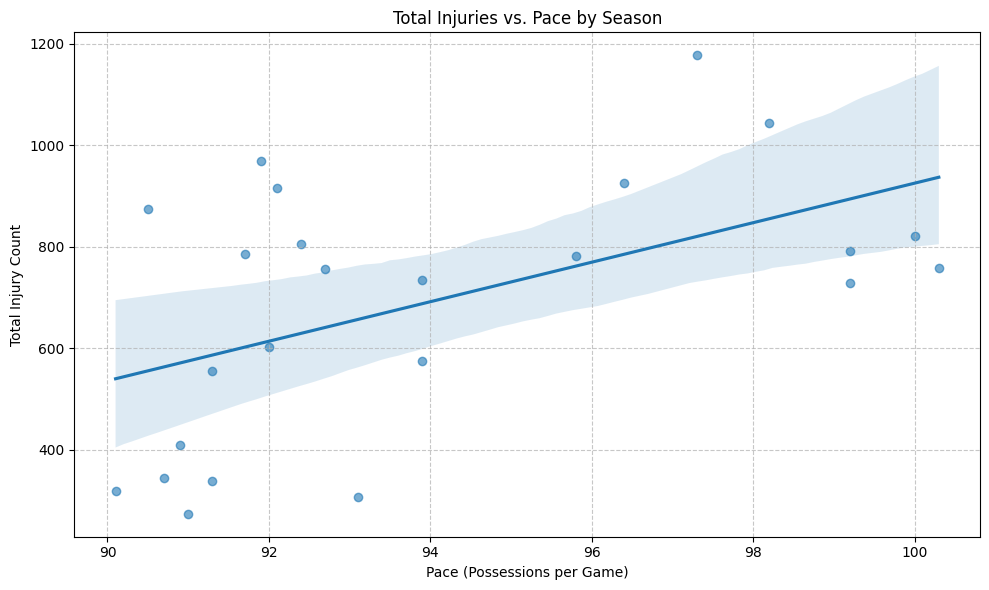

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the correlation coefficient between Pace and Injury_Count
correlation_pace_injuries = merged_df['Pace'].corr(merged_df['Injury_Count'])
print(f"Correlation coefficient between Pace and Total Injuries: {correlation_pace_injuries:.3f}")

# Plot comparing total injuries to Pace by season
plt.figure(figsize=(10, 6))
sns.regplot(x='Pace', y='Injury_Count', data=merged_df, scatter_kws={'alpha':0.6})
plt.title('Total Injuries vs. Pace by Season')
plt.xlabel('Pace (Possessions per Game)')
plt.ylabel('Total Injury Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation coefficient between 3PA/G and Total Injuries: 0.589


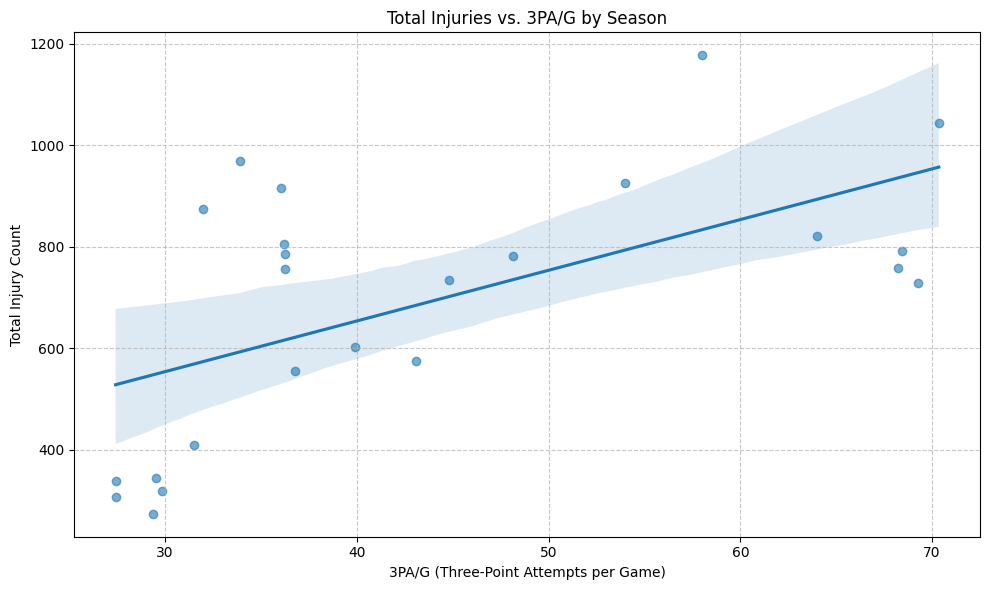

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the correlation coefficient between 3PA/G and Injury_Count
correlation_3pa_injuries = merged_df['3PA/G'].corr(merged_df['Injury_Count'])
print(f"Correlation coefficient between 3PA/G and Total Injuries: {correlation_3pa_injuries:.3f}")

# Plot comparing total injuries to 3PA/G by season
plt.figure(figsize=(10, 6))
sns.regplot(x='3PA/G', y='Injury_Count', data=merged_df, scatter_kws={'alpha':0.6})
plt.title('Total Injuries vs. 3PA/G by Season')
plt.xlabel('3PA/G (Three-Point Attempts per Game)')
plt.ylabel('Total Injury Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Task
Calculate the count of 'knee' injuries per season from the `df_filtered` DataFrame and prepare it for merging by renaming the 'Season' column to 'Year'.

## Calculate Knee Injury Count per Season

### Subtask:
Filter the `df_filtered` DataFrame to include only 'knee' injuries (where `simplified_notes` is 'knee'). Then, group this filtered data by 'Season' and count the occurrences to get the 'Knee_Injury_Count' per season. Rename the 'Season' column to 'Year' for consistency and merging.


**Reasoning**:
First, I will filter the `df_filtered` DataFrame to include only rows where 'simplified_notes' is 'knee'. Then, I will group this filtered data by 'Season' and count the occurrences to get the 'Knee_Injury_Count' per season. Finally, I will rename the 'Season' column to 'Year' for consistency and display the head of the resulting DataFrame.



In [48]:
df_knee_injuries = df_filtered[df_filtered['simplified_notes'] == 'knee']

knee_injuries_per_season = df_knee_injuries.groupby('Season').size().reset_index(name='Knee_Injury_Count')

knee_injuries_per_season = knee_injuries_per_season.rename(columns={'Season': 'Year'})

print("Knee injuries per season calculated and 'Season' column renamed to 'Year':")
display(knee_injuries_per_season.head())

Knee injuries per season calculated and 'Season' column renamed to 'Year':


,Year,Knee_Injury_Count
0,2000,103
1,2001,106
2,2002,102
3,2003,85
4,2004,108


## Merge Data for Knee Injuries

### Subtask:
Merge the `knee_injuries_per_season` DataFrame (containing 'Knee_Injury_Count' and 'Year') with the `stats_df_selected` DataFrame (containing league-wide statistics) on the 'Year' column to create a combined DataFrame for analysis.


**Reasoning**:
I will merge the `knee_injuries_per_season` DataFrame with the `stats_df_selected` DataFrame on the 'Year' column using an inner join, and then display the head and info of the resulting merged DataFrame to verify the operation.



In [49]:
merged_df_knee_injuries = pd.merge(knee_injuries_per_season, stats_df_selected, on='Year', how='inner')

print("Merged DataFrame for knee injuries:")
display(merged_df_knee_injuries.head())

print("\nMerged DataFrame Info for knee injuries:")
merged_df_knee_injuries.info()

Merged DataFrame for knee injuries:


,Year,Knee_Injury_Count,FGA/G,3PA/G,FTA/G,PF/G,Pace
0,2000,103,164.188394,27.429773,50.555929,46.600505,93.1
1,2001,106,161.197645,27.415475,49.736754,44.695542,91.3
2,2002,102,162.542473,29.498738,47.645080,42.470143,90.7
3,2003,85,161.571909,29.362489,48.867115,43.507149,91.0
4,2004,108,159.631623,29.850294,48.413793,42.898234,90.1



Merged DataFrame Info for knee injuries:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     int64  
 1   Knee_Injury_Count  24 non-null     int64  
 2   FGA/G              24 non-null     float64
 3   3PA/G              24 non-null     float64
 4   FTA/G              24 non-null     float64
 5   PF/G               24 non-null     float64
 6   Pace               24 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.4 KB


## Plot Knee Injuries vs. Pace

### Subtask:
Generate a `regplot` showing the relationship between 'Pace' and 'Knee_Injury_Count' by season. Also, calculate and print the correlation coefficient between these two variables.


**Reasoning**:
I will calculate the correlation coefficient between 'Pace' and 'Knee_Injury_Count', then generate a `regplot` to visualize their relationship, and finally display the plot. This directly addresses all points in the subtask instructions.



Correlation coefficient between Pace and Knee Injuries: 0.549


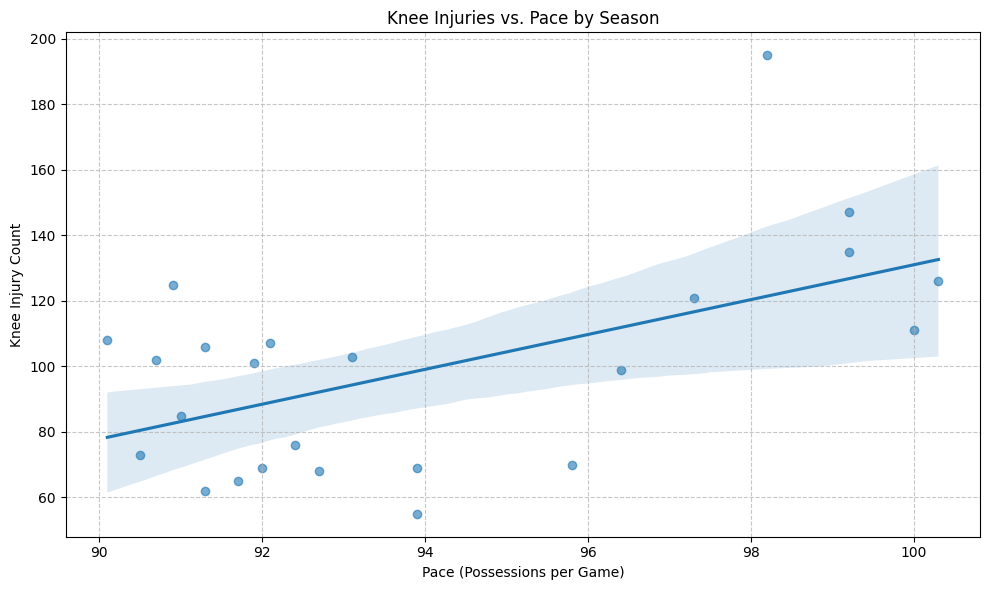

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient between Pace and Knee_Injury_Count
correlation_pace_knee_injuries = merged_df_knee_injuries['Pace'].corr(merged_df_knee_injuries['Knee_Injury_Count'])
print(f"Correlation coefficient between Pace and Knee Injuries: {correlation_pace_knee_injuries:.3f}")

# Plot comparing Knee injuries to Pace by season
plt.figure(figsize=(10, 6))
sns.regplot(x='Pace', y='Knee_Injury_Count', data=merged_df_knee_injuries, scatter_kws={'alpha':0.6})
plt.title('Knee Injuries vs. Pace by Season')
plt.xlabel('Pace (Possessions per Game)')
plt.ylabel('Knee Injury Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Plot Knee Injuries vs. 3PA/G

### Subtask:
Generate a `regplot` showing the relationship between '3PA/G' and 'Knee_Injury_Count' by season. Also, calculate and print the correlation coefficient between these two variables.


**Reasoning**:
I will calculate the correlation coefficient between '3PA/G' and 'Knee_Injury_Count' and then generate a `regplot` to visualize their relationship, as well as display the plot. This directly addresses all points in the subtask instructions.



Correlation coefficient between 3PA/G and Knee Injuries: 0.582


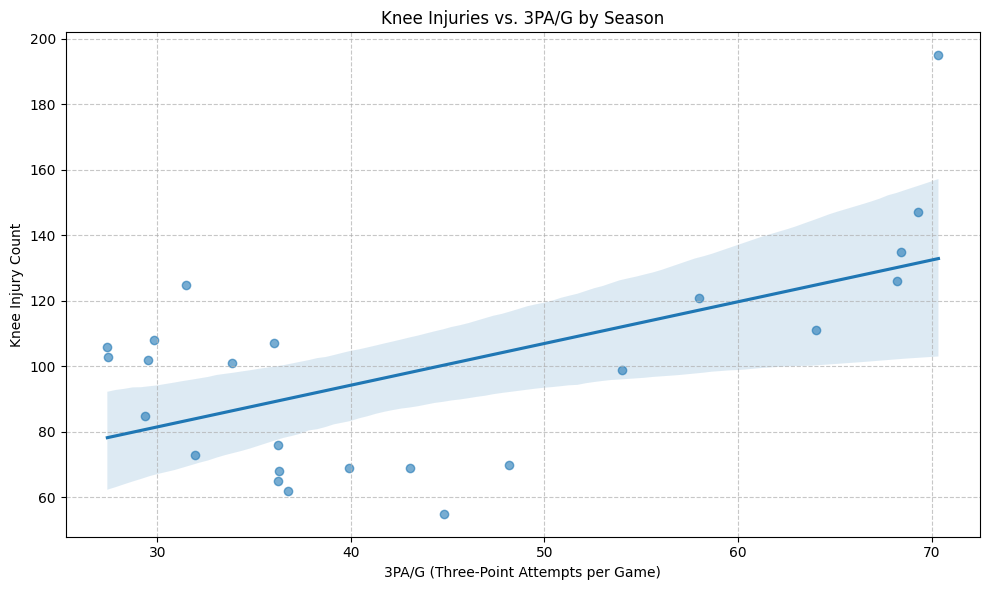

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient between 3PA/G and Knee_Injury_Count
correlation_3pa_knee_injuries = merged_df_knee_injuries['3PA/G'].corr(merged_df_knee_injuries['Knee_Injury_Count'])
print(f"Correlation coefficient between 3PA/G and Knee Injuries: {correlation_3pa_knee_injuries:.3f}")

# Plot comparing Knee injuries to 3PA/G by season
plt.figure(figsize=(10, 6))
sns.regplot(x='3PA/G', y='Knee_Injury_Count', data=merged_df_knee_injuries, scatter_kws={'alpha':0.6})
plt.title('Knee Injuries vs. 3PA/G by Season')
plt.xlabel('3PA/G (Three-Point Attempts per Game)')
plt.ylabel('Knee Injury Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the findings from the correlation analyses and visualizations for 'knee' injuries in relation to 'Pace' and '3PA/G'.


## Summary:

### Q&A
The findings from the correlation analyses and visualizations for 'knee' injuries in relation to 'Pace' and '3PA/G' are as follows:
*   There is a moderate positive correlation between 'Pace' and 'Knee\_Injury\_Count' (correlation coefficient of approximately 0.549).
*   There is a moderately positive correlation between '3PA/G' and 'Knee\_Injury\_Count' (correlation coefficient of 0.582).

### Data Analysis Key Findings
*   The number of 'knee' injuries per season was successfully calculated and merged with league-wide statistics for further analysis.
*   A moderate positive correlation was observed between 'Pace' (possessions per game) and the count of 'Knee\_Injury\_Count' with a correlation coefficient of approximately 0.549. This suggests that as game pace increases, knee injuries tend to increase.
*   A moderately positive correlation was found between '3PA/G' (three-point attempts per game) and 'Knee\_Injury\_Count' with a correlation coefficient of 0.582. This indicates that seasons with higher three-point attempt rates are associated with a greater number of knee injuries.

### Insights or Next Steps
*   Investigate potential confounding factors or mediating variables that could explain the observed correlations between increased game pace, three-point attempts, and knee injuries, such as player load, game intensity, or changes in defensive schemes.
*   Perform a multi-variate regression analysis to determine the combined effect and individual significance of 'Pace', '3PA/G', and other relevant statistical categories on 'Knee\_Injury\_Count', controlling for other variables.


# Task
## Calculate Ankle Injury Count per Season

### Subtask:
Filter the `df_filtered` DataFrame to include only 'ankle' injuries (where `simplified_notes` is 'ankle'). Then, group this filtered data by 'Season' and count the occurrences to get the 'Ankle_Injury_Count' per season. Rename the 'Season' column to 'Year' for consistency and merging.

## Calculate Ankle Injury Count per Season

### Subtask:
Filter the `df_filtered` DataFrame to include only 'ankle' injuries (where `simplified_notes` is 'ankle'). Then, group this filtered data by 'Season' and count the occurrences to get the 'Ankle_Injury_Count' per season. Rename the 'Season' column to 'Year' for consistency and merging.


**Reasoning**:
I will filter the `df_filtered` DataFrame for 'ankle' injuries, group by 'Season' to count them, rename the 'Season' column to 'Year', and then display the head of the new DataFrame to fulfill all instructions of the subtask.



In [52]:
df_ankle_injuries = df_filtered[df_filtered['simplified_notes'] == 'ankle']

ankle_injuries_per_season = df_ankle_injuries.groupby('Season').size().reset_index(name='Ankle_Injury_Count')

ankle_injuries_per_season = ankle_injuries_per_season.rename(columns={'Season': 'Year'})

print("Ankle injuries per season calculated and 'Season' column renamed to 'Year':")
display(ankle_injuries_per_season.head())

Ankle injuries per season calculated and 'Season' column renamed to 'Year':


,Year,Ankle_Injury_Count
0,2000,41
1,2001,47
2,2002,56
3,2003,39
4,2004,42


## Merge Data for Ankle Injuries

### Subtask:
Merge the `ankle_injuries_per_season` DataFrame (containing 'Ankle_Injury_Count' and 'Year') with the `stats_df_selected` DataFrame (containing league-wide statistics) on the 'Year' column to create a combined DataFrame for analysis.

**Reasoning**:
I will merge the `ankle_injuries_per_season` DataFrame with the `stats_df_selected` DataFrame on the 'Year' column using an inner join, and then display the head and info of the resulting merged DataFrame to verify the operation, as per the subtask instructions.



In [53]:
merged_df_ankle_injuries = pd.merge(ankle_injuries_per_season, stats_df_selected, on='Year', how='inner')

print("Merged DataFrame for ankle injuries:")
display(merged_df_ankle_injuries.head())

print("\nMerged DataFrame Info for ankle injuries:")
merged_df_ankle_injuries.info()

Merged DataFrame for ankle injuries:


,Year,Ankle_Injury_Count,FGA/G,3PA/G,FTA/G,PF/G,Pace
0,2000,41,164.188394,27.429773,50.555929,46.600505,93.1
1,2001,47,161.197645,27.415475,49.736754,44.695542,91.3
2,2002,56,162.542473,29.498738,47.645080,42.470143,90.7
3,2003,39,161.571909,29.362489,48.867115,43.507149,91.0
4,2004,42,159.631623,29.850294,48.413793,42.898234,90.1



Merged DataFrame Info for ankle injuries:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                24 non-null     int64  
 1   Ankle_Injury_Count  24 non-null     int64  
 2   FGA/G               24 non-null     float64
 3   3PA/G               24 non-null     float64
 4   FTA/G               24 non-null     float64
 5   PF/G                24 non-null     float64
 6   Pace                24 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.4 KB


## Plot Ankle Injuries vs. Pace

### Subtask:
Generate a `regplot` showing the relationship between 'Pace' and 'Ankle_Injury_Count' by season. Also, calculate and print the correlation coefficient between these two variables.

**Reasoning**:
I will calculate the correlation coefficient between 'Pace' and 'Ankle_Injury_Count', and then generate a `regplot` to visualize their relationship, as well as display the plot. This directly addresses all points in the subtask instructions.



Correlation coefficient between Pace and Ankle Injuries: 0.811


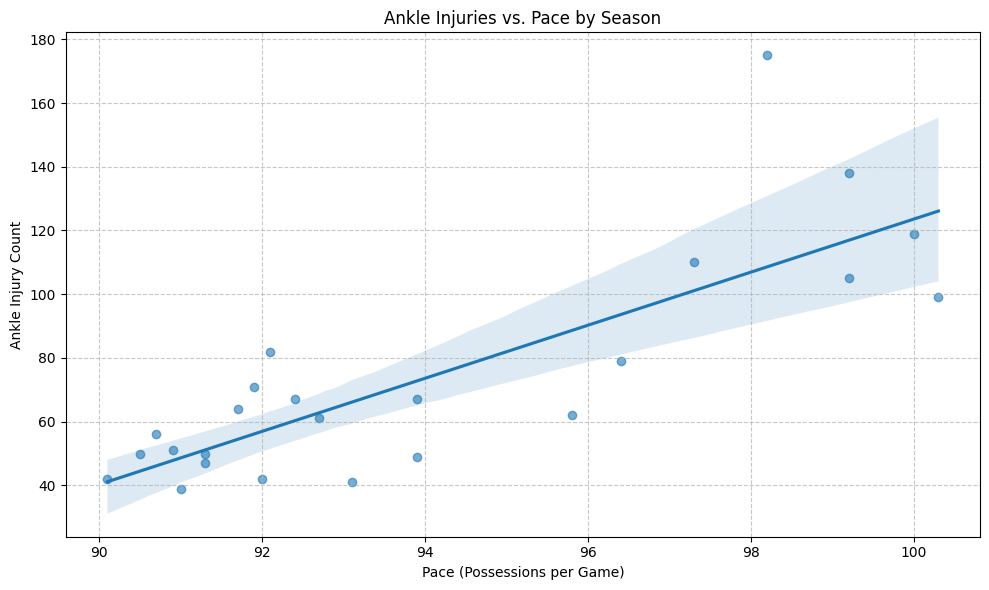

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient between Pace and Ankle_Injury_Count
correlation_pace_ankle_injuries = merged_df_ankle_injuries['Pace'].corr(merged_df_ankle_injuries['Ankle_Injury_Count'])
print(f"Correlation coefficient between Pace and Ankle Injuries: {correlation_pace_ankle_injuries:.3f}")

# Plot comparing Ankle injuries to Pace by season
plt.figure(figsize=(10, 6))
sns.regplot(x='Pace', y='Ankle_Injury_Count', data=merged_df_ankle_injuries, scatter_kws={'alpha':0.6})
plt.title('Ankle Injuries vs. Pace by Season')
plt.xlabel('Pace (Possessions per Game)')
plt.ylabel('Ankle Injury Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Plot Ankle Injuries vs. 3PA/G

### Subtask:
Generate a `regplot` showing the relationship between '3PA/G' and 'Ankle_Injury_Count' by season. Also, calculate and print the correlation coefficient between these two variables.

**Reasoning**:
Following the pattern of previous analyses, I will now calculate the correlation coefficient between '3PA/G' and 'Ankle_Injury_Count' and then generate a `regplot` to visualize their relationship, as well as display the plot. This directly addresses all points in the subtask instructions.



Correlation coefficient between 3PA/G and Ankle Injuries: 0.870


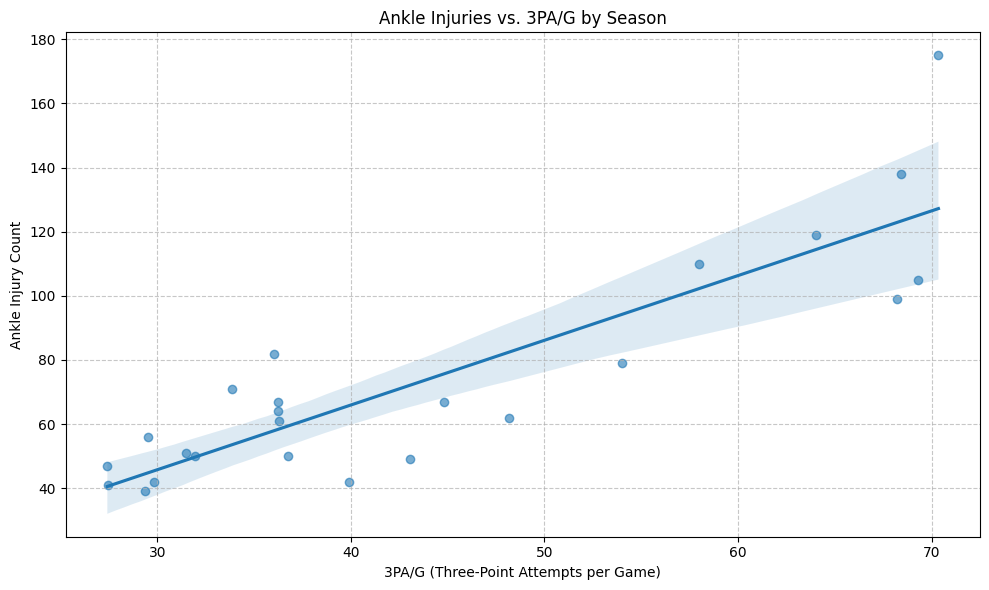

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient between 3PA/G and Ankle_Injury_Count
correlation_3pa_ankle_injuries = merged_df_ankle_injuries['3PA/G'].corr(merged_df_ankle_injuries['Ankle_Injury_Count'])
print(f"Correlation coefficient between 3PA/G and Ankle Injuries: {correlation_3pa_ankle_injuries:.3f}")

# Plot comparing Ankle injuries to 3PA/G by season
plt.figure(figsize=(10, 6))
sns.regplot(x='3PA/G', y='Ankle_Injury_Count', data=merged_df_ankle_injuries, scatter_kws={'alpha':0.6})
plt.title('Ankle Injuries vs. 3PA/G by Season')
plt.xlabel('3PA/G (Three-Point Attempts per Game)')
plt.ylabel('Ankle Injury Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

### Q&A
The findings from the correlation analyses and visualizations for 'ankle' injuries in relation to 'Pace' and '3PA/G' are as follows:
*   There is a strong positive correlation between 'Pace' and 'Ankle_Injury_Count' (correlation coefficient of approximately 0.811).
*   There is a very strong positive correlation between '3PA/G' and 'Ankle_Injury_Count' (correlation coefficient of 0.870).

### Data Analysis Key Findings
*   The number of 'ankle' injuries per season was successfully calculated and merged with league-wide statistics for further analysis.
*   A strong positive correlation was observed between 'Pace' (possessions per game) and the count of 'Ankle_Injury_Count' with a correlation coefficient of approximately 0.811. This suggests that as game pace increases, ankle injuries tend to increase significantly.
*   A very strong positive correlation was found between '3PA/G' (three-point attempts per game) and 'Ankle_Injury_Count' with a correlation coefficient of 0.870. This indicates that seasons with higher three-point attempt rates are strongly associated with a greater number of ankle injuries.

### Insights or Next Steps
*   Investigate the underlying biomechanical reasons why increased pace and three-point attempts might lead to a higher incidence of ankle injuries. This could involve looking at changes in player movement patterns, landing mechanics, or increased fatigue.
*   Perform a multi-variate regression analysis to determine the combined effect and individual significance of 'Pace', '3PA/G', and other relevant statistical categories on 'Ankle_Injury_Count', controlling for other variables and potentially identifying interaction effects.

## Summary:

### Q&A
The findings from the correlation analyses and visualizations for 'ankle' injuries in relation to 'Pace' and '3PA/G' are as follows:
*   There is a strong positive correlation between 'Pace' and 'Ankle_Injury_Count' (correlation coefficient of approximately 0.811).
*   There is a very strong positive correlation between '3PA/G' and 'Ankle_Injury_Count' (correlation coefficient of 0.870).

### Data Analysis Key Findings
*   The number of 'ankle' injuries per season was successfully calculated and merged with league-wide statistics for further analysis.
*   A strong positive correlation was observed between 'Pace' (possessions per game) and the count of 'Ankle_Injury_Count' with a correlation coefficient of approximately 0.811. This suggests that as game pace increases, ankle injuries tend to increase significantly.
*   A very strong positive correlation was found between '3PA/G' (three-point attempts per game) and 'Ankle_Injury_Count' with a correlation coefficient of 0.870. This indicates that seasons with higher three-point attempt rates are strongly associated with a greater number of ankle injuries.

### Insights or Next Steps
*   Investigate the underlying biomechanical reasons why increased pace and three-point attempts might lead to a higher incidence of ankle injuries. This could involve looking at changes in player movement patterns, landing mechanics, or increased fatigue.
*   Perform a multi-variate regression analysis to determine the combined effect and individual significance of 'Pace', '3PA/G', and other relevant statistical categories on 'Ankle_Injury_Count', controlling for other variables and potentially identifying interaction effects.

## Final Task

### Subtask:
Summarize the findings from the correlation analyses and visualizations for 'ankle' injuries in relation to 'Pace' and '3PA/G'.


## Summary:

### Q&A
The findings from the correlation analyses and visualizations for 'ankle' injuries in relation to 'Pace' and '3PA/G' are as follows:
*   There is a strong positive correlation between 'Pace' and 'Ankle\_Injury\_Count' (correlation coefficient of approximately 0.811).
*   There is a very strong positive correlation between '3PA/G' and 'Ankle\_Injury\_Count' (correlation coefficient of 0.870).

### Data Analysis Key Findings
*   The number of 'ankle' injuries per season was successfully calculated and merged with league-wide statistics for further analysis.
*   A strong positive correlation was observed between 'Pace' (possessions per game) and the count of 'Ankle\_Injury\_Count' with a correlation coefficient of approximately 0.811. This suggests that as game pace increases, ankle injuries tend to increase significantly.
*   A very strong positive correlation was found between '3PA/G' (three-point attempts per game) and 'Ankle\_Injury\_Count' with a correlation coefficient of 0.870. This indicates that seasons with higher three-point attempt rates are strongly associated with a greater number of ankle injuries.

### Insights or Next Steps
*   Investigate the underlying biomechanical reasons why increased pace and three-point attempts might lead to a higher incidence of ankle injuries. This could involve looking at changes in player movement patterns, landing mechanics, or increased fatigue.
*   Perform a multi-variate regression analysis to determine the combined effect and individual significance of 'Pace', '3PA/G', and other relevant statistical categories on 'Ankle\_Injury\_Count', controlling for other variables and potentially identifying interaction effects.
